In [1]:
import pandas as pd
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

#Loading gene variants data
d = pd.read_csv('Personalized Cancer Diagnosis case study 2/training_variants')
d.shape
d.head(5)

C:\Users\rock\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [2]:
#Loading text data

text = pd.read_csv('Personalized Cancer Diagnosis case study 2/training_text', sep = '\|\|', engine = 'python', names = ['ID', 'TEXT'], skiprows = 1)

text.head(5)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [3]:
#Text preprocessing 
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ''
        #replacing every special character with space
        total_text = re.sub(r'[^a-zA-Z0-9\n]', r' ', str(total_text))
        
        #replacing multiple spaces with single space
        total_text = re.sub(r'\s+', r' ', str(total_text))
        
        #converting all the haracters to lower case
        total_text = total_text.lower()
        
        #retaining words that aren't stop words
        for word in total_text.split():
            if not word in stop_words:
                string += word + ' '
        
        text[column][index] = string

In [4]:
#applying preprocessing

for index, row in text.iterrows():
    nlp_preprocessing(row['TEXT'], index, 'TEXT')

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
#merging data

data = pd.merge(d, text, on = 'ID', how ='left')
data.head(5)
data.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'TEXT'], dtype='object')

In [6]:
#transforming data into train, cv and test data

y_true = data['Class']
#data = data.drop('Class', axis = 1)

data.Gene = data.Gene.str.replace('\s+', '_')
data.Variation = data.Variation.str.replace('\s+', '_')

#first into train and test
x_tr, test_df, y_tr, y_test = cross_validation.train_test_split(data, y_true, test_size = 0.2, stratify = y_true, random_state = 1)

#second train into train and cv

tr_df, cv_df, y_tr, y_cv = cross_validation.train_test_split(x_tr, y_tr, test_size = 0.2, stratify = y_tr, random_state = 1)

print(tr_df.shape)
print(cv_df.shape)
print(test_df.shape)

(2124, 5)
(532, 5)
(665, 5)


In [7]:
#Checking if data set is balanced or imbalanced via class

import matplotlib.pyplot as plt

train_class_distribution = tr_df['Class'].value_counts().sortlevel()
cv_class_distribution = cv_df['Class'].value_counts().sortlevel()
test_class_distribution = test_df['Class'].value_counts().sortlevel()

#plotting train distribution

my_colors = ['r','g','b','k','y','m','c']
train_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data pts per class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

#plotting CV distribution

my_colors = ['r','g','b','k','y','m','c']
cv_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data pts per class')
plt.title('Distribution of yi in cv data')
plt.grid()
plt.show()

#plotting train distribution

my_colors = ['r','g','b','k','y','m','c']
test_class_distribution.plot(kind = 'bar', color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data pts per class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

C:\Users\rock\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  """
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  
C:\Users\rock\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: sortlevel is deprecated, use sort_index(level=...)
  import sys


Its an imbalanced data set

Log loss on Cross Validation Data using Random Model 2.487991589814221
Log loss on Test Data using Random Model 2.4732077446163454


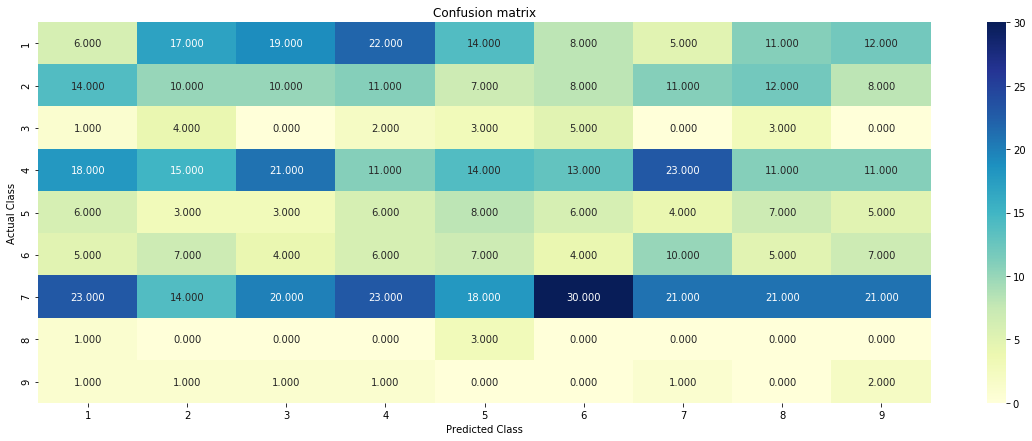

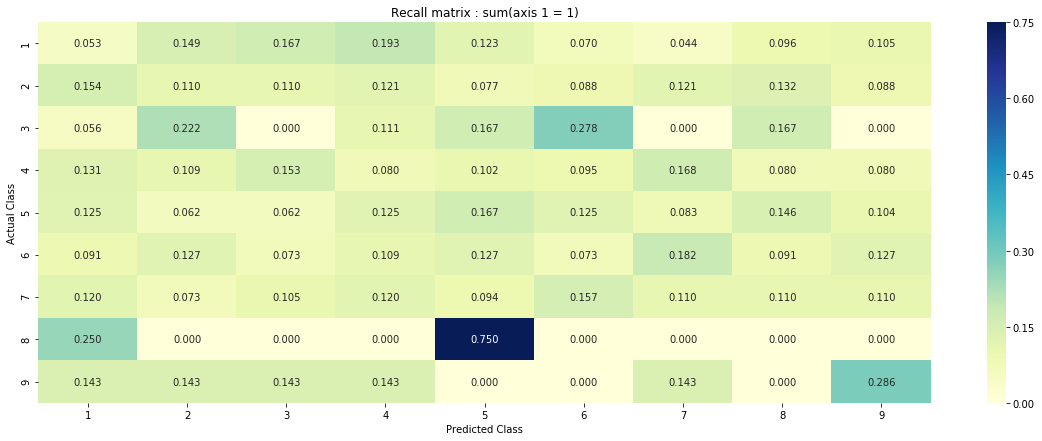

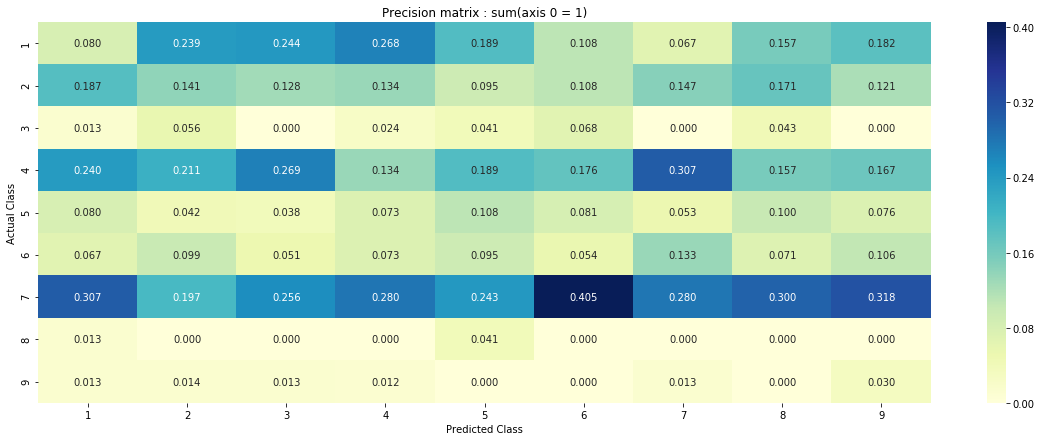

In [8]:
#Random model - To check the worst error a model can make using this data. We generate 9 class probabilities such that they sum to 1
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

#Confusion matrix fn, precision matrix fn, recall matrix fn

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    #Computing recall matrix
    A = (((C.T)/(C.sum(axis = 1))).T)
    
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    #Computing precision matrix
    B = (C/C.sum(axis = 0))
     #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]

    #Plotting confusion matrix
    plt.figure(figsize = (20,7))
    plt.title('Confusion matrix')
    sns.heatmap(C, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

    #Plotting recall matrix
    plt.figure(figsize = (20,7))
    plt.title('Recall matrix : sum(axis 1 = 1)')
    sns.heatmap(A, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

    #Plotting precision matrix
    plt.figure(figsize = (20,7))
    plt.title('Precision matrix : sum(axis 0 = 1)')
    sns.heatmap(B, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels = labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()
    
import seaborn as sns
import numpy as np

#computiing log loss
test_data_len = test_df.shape[0] #row 
cv_data_len = cv_df.shape[0] #row

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)

plot_confusion_matrix(y_test, predicted_y+1)

Observation - Using random model the worst model using this data will have a log loss of ~2.5

In [9]:
#Univariate analysis - Gene feature

#No. of categries of gene feature

unique_genes = tr_df['Gene'].value_counts()

print('Categories of genes are as follows: \n', unique_genes.head(10))
print('Total no. of categories are: {}'.format(unique_genes.shape[0]))

Categories of genes are as follows: 
 BRCA1     168
TP53      111
PTEN       86
EGFR       86
BRCA2      80
BRAF       65
KIT        60
ALK        44
ERBB2      39
PDGFRA     38
Name: Gene, dtype: int64
Total no. of categories are: 235


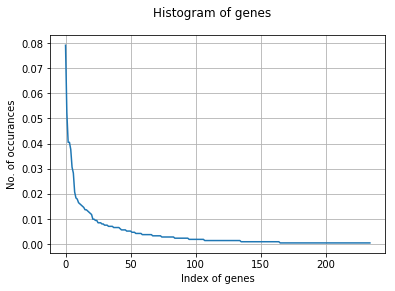

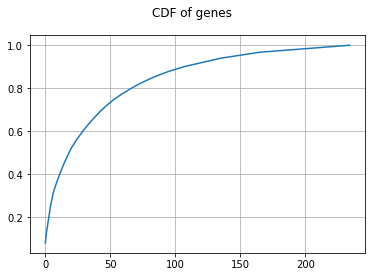

In [10]:
#Distribution of the categories

#Histogram
s = sum(unique_genes.values)
h = unique_genes.values/s

plt.plot(h)
plt.suptitle('Histogram of genes')
plt.xlabel('Index of genes')
plt.ylabel('No. of occurances')
plt.grid()
plt.show()

#CDF

c = np.cumsum(h)
plt.plot(c)
plt.suptitle('CDF of genes')
plt.grid()
plt.show()

Observation - What we an infer from the histogram is that, most of the categories are large..and what we infer from the cdf is
that 80% of the values consist of top 50 categories

In [11]:
# How to featurize or vectorize gene feature(categorical) ?
# There are 2 ways to do it -
# 1. One-hot encoding - Better for Naive Bayes, Logistic Regression, Linear SVM
# 2. Response coding - Better for Random forest

# We will use one-hot encoding as we will solve this probelem using NB and Logistic regression

from sklearn.feature_extraction.text import CountVectorizer
gene_vectorizer = CountVectorizer()

train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(tr_df['Gene'].values)
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'].values)
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'].values)

print(train_gene_feature_onehotCoding.shape)

(2124, 235)


In [12]:
# Predicting yi's for gene feature - Determines the usefulness of the feature
# Using Logistic Regression and  Calibrated classifier(Using this cuz we want class probablilities and log loss to compare with random model)

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters = { 'C' : np.random.rand(100)}
#10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4
random = RandomizedSearchCV(LogisticRegression(), tuned_parameters, scoring = 'neg_log_loss')
random.fit(train_gene_feature_onehotCoding, y_tr)
print(random.best_estimator_)


lor = LogisticRegression(C = 0.85, penalty = 'l2')
lor.fit(train_gene_feature_onehotCoding, y_tr)
clf = CalibratedClassifierCV(lor, method = 'sigmoid')
clf.fit(train_gene_feature_onehotCoding, y_tr)

predict_y = clf.predict_proba(train_gene_feature_onehotCoding)
train_logloss = log_loss(y_tr, predict_y, labels=clf.classes_, eps=1e-15)
print('Train log loss for feature gene is {}'.format(train_logloss))

predict_y = clf.predict_proba(cv_gene_feature_onehotCoding)
cv_logloss = log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15)
print('CV logloss for feature gene is {}'.format(cv_logloss))

predict_y = clf.predict_proba(test_gene_feature_onehotCoding)
test_logloss = log_loss(y_test, predict_y, labels = clf.classes_, eps =1e-15)
print('Test logloss for feature gene is {}'.format(test_logloss))

LogisticRegression(C=0.9724876551315539, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Train log loss for feature gene is 1.0840885483741989
CV logloss for feature gene is 1.2362891821568858
Test logloss for feature gene is 1.2293974800321155


Observation = Gene is an important feature as it gives a significant less logloss that the random model using logistic regression.
Also the gene feature is stable across all the data sets i.e., train, cv, test otherwise the diffference between logloss would have
been much more

In [13]:
# Univariate analysis - Variation feature

unique_variations = tr_df['Variation'].value_counts()
unique_variations.head(10)

unique_variations.shape[0]

1920

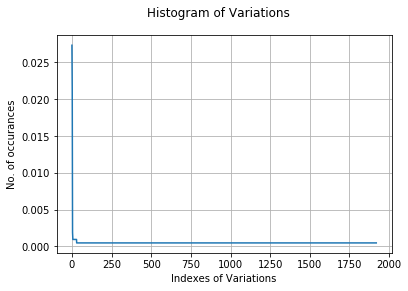

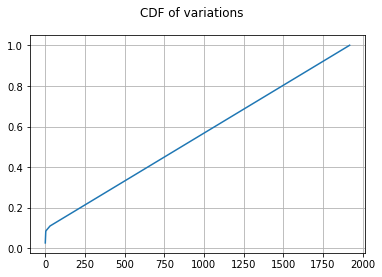

In [14]:
# Histogram(pdf)

s = sum(unique_variations.values)
h = unique_variations.values/s

plt.plot(h)
plt.suptitle('Histogram of Variations')
plt.xlabel('Indexes of Variations')
plt.ylabel('No. of occurances')
plt.grid()
plt.show()


#CDF

c = np.cumsum(h)
plt.plot(c)
plt.suptitle('CDF of variations')
plt.grid()
plt.show()

Observation - There are very less large categories of variations and more small categories of variations

In [15]:
# One-hot encoding
from sklearn.feature_extraction.text import CountVectorizer
var_vectorizer = CountVectorizer()

train_var_feature_onehotCoding = var_vectorizer.fit_transform(tr_df['Variation'].values)
cv_var_feature_onehotCoding = var_vectorizer.transform(cv_df['Variation'].values)
test_var_feature_onehotCoding = var_vectorizer.transform(test_df['Variation'].values)

print(train_var_feature_onehotCoding.shape)

(2124, 1948)


In [16]:
# Predicting yi's for variation feature - Determines the usefulness of the feature
# Using Logistic Regression and  Calibrated classifier(Using this cuz we want class probablilities and log loss to compare with random model)

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV

tuned_param = { 'C' : np.random.rand(100)}

rand = RandomizedSearchCV(LogisticRegression(), tuned_param, scoring = 'neg_log_loss')
rand.fit(train_var_feature_onehotCoding, y_tr)

print(rand.best_estimator_)

lor_var = LogisticRegression(C = 0.95, penalty = 'l2')
lor_var.fit(train_var_feature_onehotCoding, y_tr)
clf_var = CalibratedClassifierCV(lor_var, method = 'sigmoid')
clf_var.fit(train_var_feature_onehotCoding, y_tr)

pred_y = clf_var.predict_proba(train_var_feature_onehotCoding)
train_logloss = log_loss(y_tr, pred_y, labels = clf.classes_, eps = 1e-15)
print('Train logloss for feature variation is {}'.format(train_logloss))

pred_y = clf_var.predict_proba(cv_var_feature_onehotCoding)
cv_logloss = log_loss(y_cv, pred_y, labels = clf.classes_, eps = 1e-15)
print('CV logloss for feature variation is {}'.format(cv_logloss))

pred_y = clf_var.predict_proba(test_var_feature_onehotCoding)
test_logloss = log_loss(y_test, pred_y, labels = clf.classes_, eps = 1e-15)
print('Test logloss for feature variation is {}'.format(test_logloss))

LogisticRegression(C=0.906215865340637, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
Train logloss for feature variation is 1.0460636490173951
CV logloss for feature variation is 1.7192373625213642
Test logloss for feature variation is 1.7072802928105344


Observation - Variation is an good feature as it gives a significant less logloss that the random model using 
logistic regression. However the variation feature is unstable across all the data sets i.e., train, cv, test as there is a big difference
in the logloss values of train, test and cv datasets

In [17]:
# Univariate analysis - Text feature usefulness

# One-hot encoding or BoW on train dataset
from sklearn.feature_extraction.text import CountVectorizer
text_vectorizer = CountVectorizer(min_df = 3)

train_text_feature_onehotCoding = text_vectorizer.fit_transform(tr_df['TEXT'].values)

#getting feature names(words)
train_text_features = text_vectorizer.get_feature_names()

print('The total nuber of unique words are: {}'.format(len(train_text_features)))

The total nuber of unique words are: 53778


In [18]:
# One-hot encoding on cv and test datasets

cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'].values)

test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'].values)


#Normalizing

from sklearn.preprocessing import normalize

train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis =0)
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis = 0)
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis = 0)

In [19]:
# Predicting yi's for text feature - Determines the usefulness of the feature
# Using Logistic Regression and  Calibrated classifier(Using this cuz we want class probablilities and log loss to compare with random model)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

tuned_par = { 'C' : np.random.rand(100)}

randtext = RandomizedSearchCV(LogisticRegression(), tuned_par, scoring = 'neg_log_loss')
randtext.fit(train_text_feature_onehotCoding, y_tr)

lor_text = LogisticRegression(C = 0.55, penalty = 'l2')
lor_text.fit(train_text_feature_onehotCoding, y_tr)
clf_text = CalibratedClassifierCV(lor_text, method = 'sigmoid')

clf_text.fit(train_text_feature_onehotCoding, y_tr)

pred_y = clf_text.predict_proba(train_text_feature_onehotCoding)
tr_logloss = log_loss(y_tr, pred_y, labels = clf_text.classes_, eps = 1e-15)
print('Train log loss on text feature is {}'.format(tr_logloss))

pred_y = clf_text.predict_proba(cv_text_feature_onehotCoding)
cv_logloss = log_loss(y_cv, pred_y, labels = clf_text.classes_, eps = 1e-15)
print('CV log loss on text feature is {}'.format(cv_logloss))

pred_y = clf_text.predict_proba(test_text_feature_onehotCoding)
test_logloss = log_loss(y_test, pred_y, labels = clf_text.classes_, eps = 1e-15)
print('Text log loss on text feature is {}'.format(test_logloss))

Train log loss on text feature is 0.6869840225584056
CV log loss on text feature is 1.101560167311424
Text log loss on text feature is 1.1254957046812748


Observation - Text is the best feature as it gives a extremely less logloss than the random model using logistic 
regression. Also, the text feature is the most stable across all the data sets

In [20]:
# ML modeling - Data preparation

#stacking the features

from scipy.sparse import hstack

train_gene_var_feature_onehotCoding = hstack((train_gene_feature_onehotCoding, train_var_feature_onehotCoding))
cv_gene_var_feature_onehotCoding = hstack((cv_gene_feature_onehotCoding, cv_var_feature_onehotCoding))
test_gene_var_feature_onehotCoding = hstack((test_gene_feature_onehotCoding, test_var_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_feature_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(tr_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_feature_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_feature_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

print('No. of points in train data : {}'.format(train_x_onehotCoding.shape))
print('No. of points in cv data : {}'.format(cv_x_onehotCoding.shape))
print('No. of points in test data : {}'.format(test_x_onehotCoding.shape))

No. of points in train data : (2124, 55961)
No. of points in cv data : (532, 55961)
No. of points in test data : (665, 55961)


Logloss on train using naive bayes model is 0.9206685321368214
Logloss on CV using naive bayes model is 1.3195302737304206
Logloss on test using naive bayes model is 1.292693902349264


C:\Users\rock\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


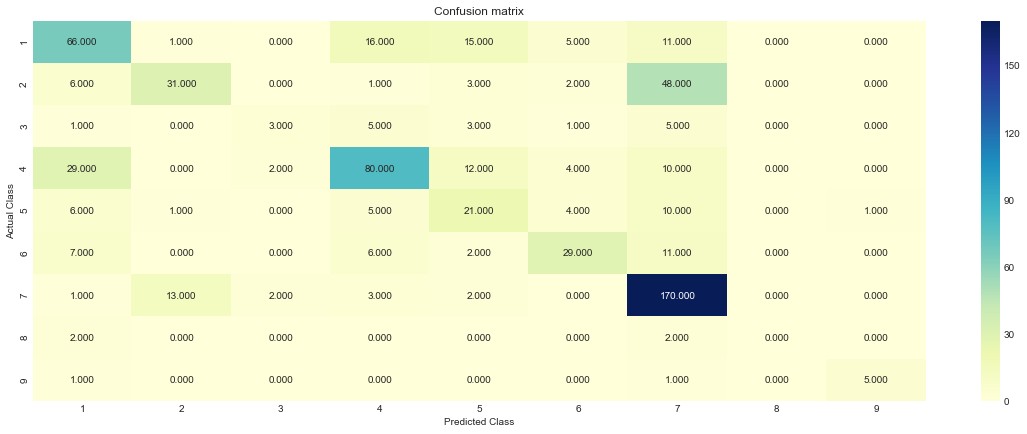

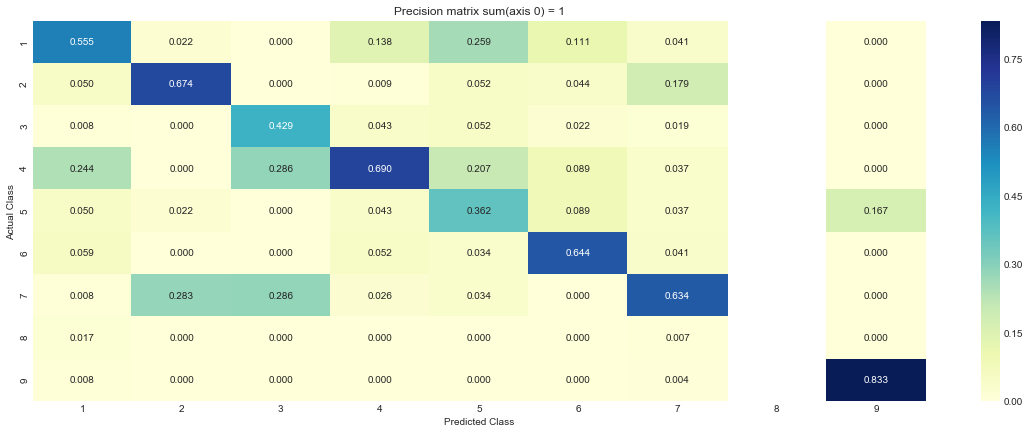

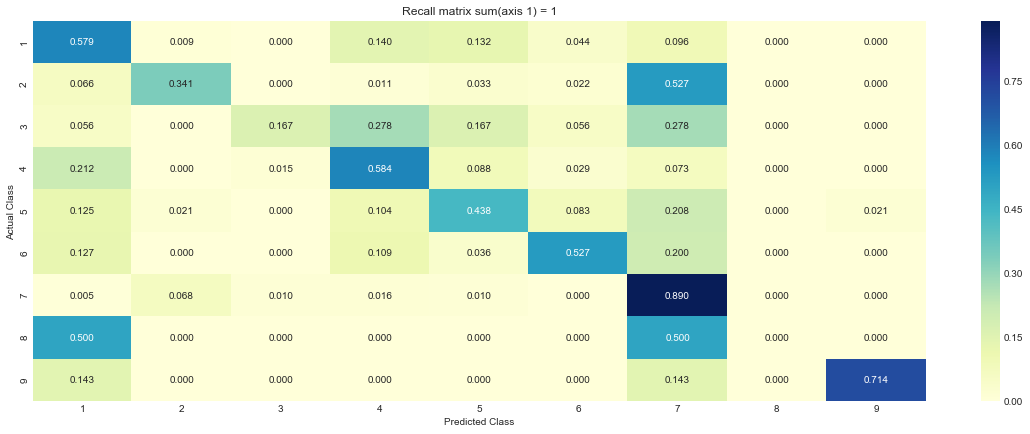

No. of misclassified points are 0.39097744360902253


In [21]:
# Applying MultinomialNB on the data set

from sklearn.naive_bayes import MultinomialNB
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import RandomizedSearchCV


tuned_param = { 'alpha' : np.random.rand(100)}

randnb = RandomizedSearchCV(MultinomialNB(), tuned_param, scoring = 'neg_log_loss')
randnb.fit(train_x_onehotCoding, train_y)

mnb = MultinomialNB(alpha = 0.8)
mnb.fit(train_x_onehotCoding, train_y)

clf = CalibratedClassifierCV(mnb, method = 'sigmoid')
clf.fit(train_x_onehotCoding, train_y)

#predicting on train
pred_y = clf.predict_proba(train_x_onehotCoding)
train_logloss = log_loss(train_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('Logloss on train using naive bayes model is {}'.format(train_logloss))

pred_y = clf.predict_proba(cv_x_onehotCoding)
cv_logloss = log_loss(cv_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('Logloss on CV using naive bayes model is {}'.format(cv_logloss))

pred_y = clf.predict_proba(test_x_onehotCoding)
test_logloss = log_loss(test_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('Logloss on test using naive bayes model is {}'.format(test_logloss))


#plotting confusion, precision and recall matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    #recall matrix
    A = (((C.T)/(C.sum(axis=1))).T)
    
    #precision matrix
    B = (C/C.sum(axis = 0))
    
    labels = [1,2,3,4,5,6,7,8,9]
    
    #PLotting Confusionn matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(C, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels =labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Confusion matrix')
    plt.show()
    
    #Plotting precision matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(B, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels =labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Precision matrix sum(axis 0) = 1')
    plt.show()
    
    #Plotting recall matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(A, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels =labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Recall matrix sum(axis 1) = 1')
    plt.show()
    

plot_confusion_matrix(test_y, clf.predict(test_x_onehotCoding.toarray()))

msc = np.count_nonzero((clf.predict(test_x_onehotCoding) - test_y))/test_y.shape[0]
print('No. of misclassified points are {}'.format(msc))

Observation - Multinomial Naive Bayes does a good job in classifying the data points correctly with just 39.09 % points in test
data to be misclassified and a significant low log loss than the random model

The logloss on train data using KNN is 1.2594542968654272
The logloss on cv data using KNN is 1.3836423818736638
The logloss on test data using KNN is 1.4078044318380638
The number of misclassified points are 0.43609022556390975%


C:\Users\rock\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


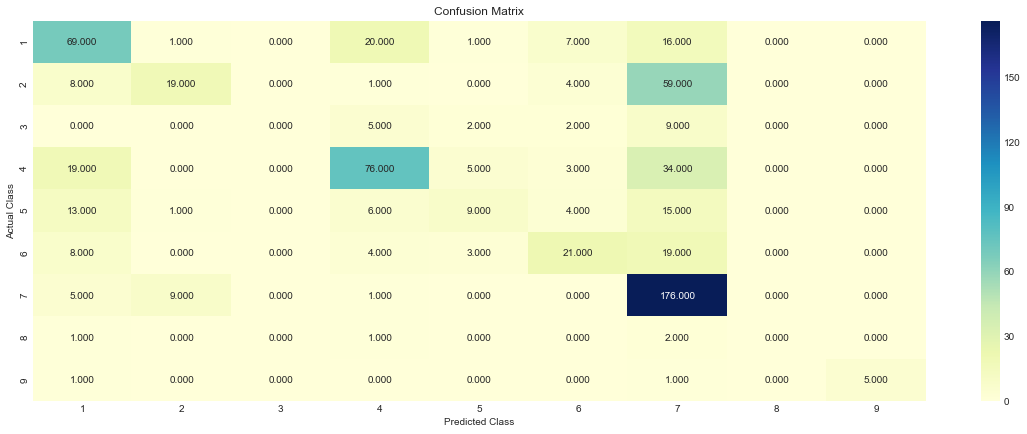

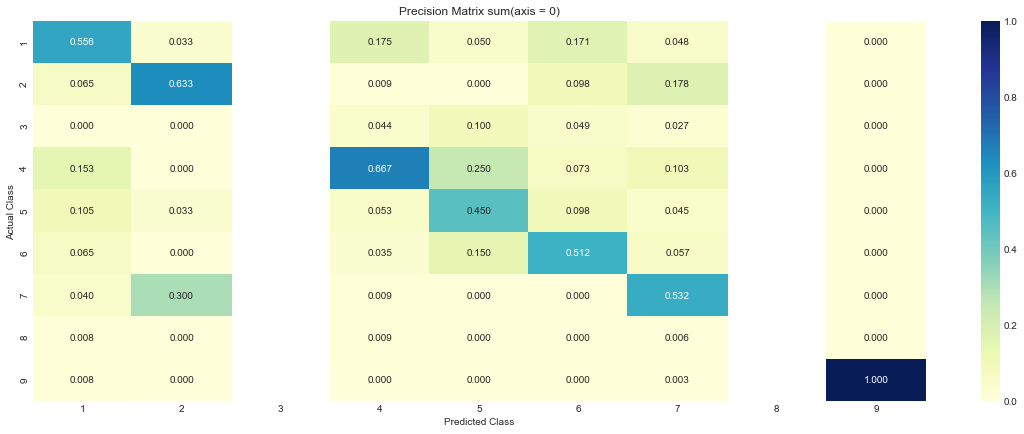

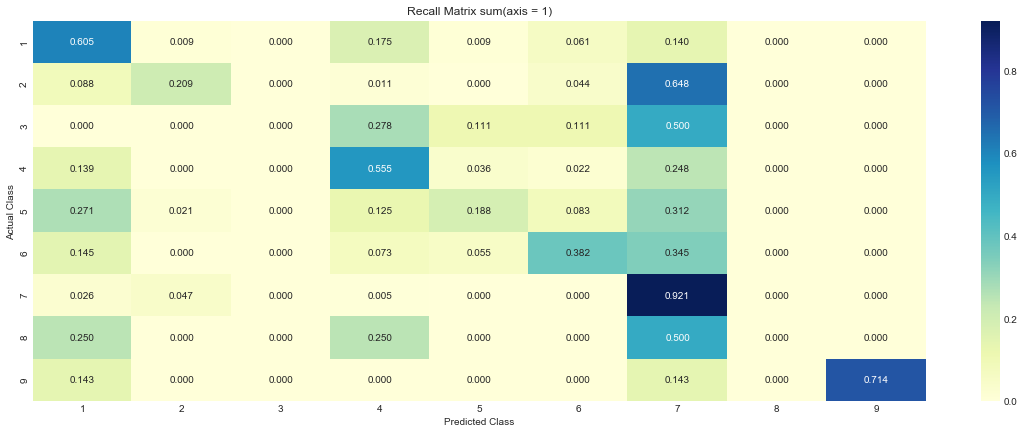

In [31]:
# Applying K-NN on Data set

from sklearn.neighbors import KNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import GridSearchCV


tuned_par = { 'n_neighbors' : [5,10,15,20,30]}

gridk = GridSearchCV(KNeighborsClassifier(), tuned_par, scoring = 'neg_log_loss')
gridk.fit(train_x_onehotCoding, train_y)

#print(gridk.best_estimator_)


knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(train_x_onehotCoding, train_y)
clf = CalibratedClassifierCV(knn, method = 'sigmoid')
clf.fit(train_x_onehotCoding, train_y)

#Prediting logloss on train
pred_y = clf.predict_proba(train_x_onehotCoding)
log_loss_train = log_loss(train_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('The logloss on train data using KNN is {}'.format(log_loss_train))

#Prediting logloss on cv
pred_y = clf.predict_proba(cv_x_onehotCoding)
log_loss_cv = log_loss(cv_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('The logloss on cv data using KNN is {}'.format(log_loss_cv))

#Prediting logloss on test
pred_y = clf.predict_proba(test_x_onehotCoding)
log_loss_test = log_loss(test_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('The logloss on test data using KNN is {}'.format(log_loss_test))


def plot_confusion_matrix(y_true, y_pred):
    C = confusion_matrix(y_true, y_pred)
    
    #Precision matrix
    A = (C/C.sum(axis = 0))
    
    #Recall matrix
    B = (((C.T)/C.sum(axis=1)).T)
    
    labels = [1,2,3,4,5,6,7,8,9]
    
    #Plotting confusion matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(C, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels =labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()
    
    #Plotting precision matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(A, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels =labels)
    plt.title('Precision Matrix sum(axis = 0)')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()
    
    #Plotting recall matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(B, annot = True, cmap = 'YlGnBu', fmt = '.3f', xticklabels = labels, yticklabels =labels)
    plt.title('Recall Matrix sum(axis = 1)')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()
   
msc = np.count_nonzero((clf.predict(test_x_onehotCoding) - test_y))/test_y.shape[0]
print('The number of misclassified points are {}%'.format(msc))

plot_confusion_matrix(test_y, clf.predict(test_x_onehotCoding))


Log loss on train data using Logistic Regression is 0.5558396257141839
Log loss on CV data using Logistic Regression is 1.045168661193739
Log loss on test data using Logistic Regression is 1.057368466311483


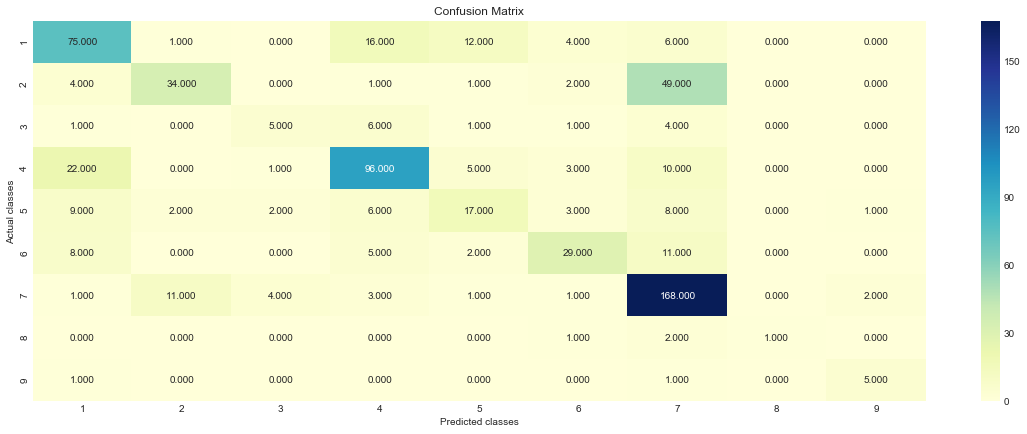

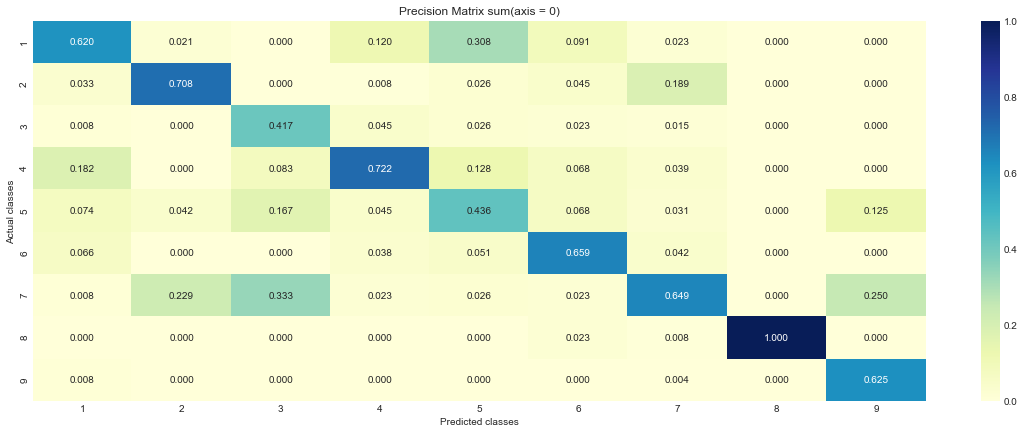

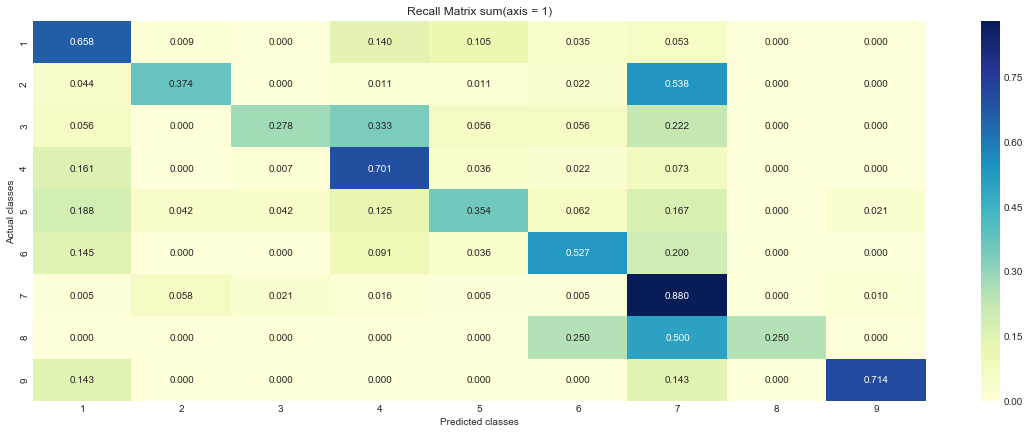

No. of misclassified points are 0.3533834586466165


In [32]:
# Logistic regression on the Dataset with class balancing

from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV

from sklearn.model_selection import RandomizedSearchCV

tuned = { 'C' : np.random.rand(100)}

rand = RandomizedSearchCV(LogisticRegression(), tuned, scoring = 'neg_log_loss')

rand.fit(train_x_onehotCoding, train_y)
#print(rand.best_estimator_)


lor = LogisticRegression(C = 0.70, penalty = 'l2', class_weight = 'balanced')
lor.fit(train_x_onehotCoding, train_y)

clf = CalibratedClassifierCV(lor, method = 'sigmoid')
clf.fit(train_x_onehotCoding, train_y)

#Predicting on train
pred_y = clf.predict_proba(train_x_onehotCoding)
logloss_train = log_loss(train_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('Log loss on train data using Logistic Regression is {}'.format(logloss_train))

#Predicting on cv
pred_y = clf.predict_proba(cv_x_onehotCoding)
logloss_cv = log_loss(cv_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('Log loss on CV data using Logistic Regression is {}'.format(logloss_cv))

#Predicting on test
pred_y = clf.predict_proba(test_x_onehotCoding)
logloss_test = log_loss(test_y, pred_y, labels = clf.classes_, eps = 1e-15)
print('Log loss on test data using Logistic Regression is {}'.format(logloss_test))


def plot_confusion_matrix(y_true, pred_y):
    
    C = confusion_matrix(y_true, pred_y)
    
    #precision matrix
    A = (C/C.sum(axis = 0))
    
    #recall matrix
    B = (((C.T)/C.sum(axis = 1)).T)
    
    labels = [1,2,3,4,5,6,7,8,9]
    
    #Plotting confusion matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(C, annot = True, cmap = 'YlGnBu', fmt = '.3f' ,xticklabels = labels, yticklabels = labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted classes')
    plt.ylabel('Actual classes')
    plt.show()
    
    #Plotting precision matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(A, annot = True, cmap = 'YlGnBu', fmt = '.3f' ,xticklabels = labels, yticklabels = labels)
    plt.title('Precision Matrix sum(axis = 0)')
    plt.xlabel('Predicted classes')
    plt.ylabel('Actual classes')
    plt.show()
    
    #Plotting recall matrix
    plt.figure(figsize = (20,7))
    sns.set_style('whitegrid')
    sns.heatmap(B, annot = True, cmap = 'YlGnBu', fmt = '.3f' ,xticklabels = labels, yticklabels = labels)
    plt.title('Recall Matrix sum(axis = 1)')
    plt.xlabel('Predicted classes')
    plt.ylabel('Actual classes')
    plt.show()
    
    
    
plot_confusion_matrix(test_y, clf.predict(test_x_onehotCoding))

msc = np.count_nonzero((clf.predict(test_x_onehotCoding) - test_y))/test_y.shape[0]
print('No. of misclassified points are {}'.format(msc))

Observation - Logistic Regression does a very good job in classifying the data points correctly with just 35.3 % points in 
test data to be misclassified and a significant low log loss than the random model, Multinomial Naive Bayes and K-NN